In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
# read files from github

url1 = 'https://raw.githubusercontent.com/Baronontrees/team-flyingTigers-CANDEV-project/main/team-flyingTigers-CANDEV-project/Form2.csv'
url2 = 'https://raw.githubusercontent.com/Baronontrees/team-flyingTigers-CANDEV-project/main/team-flyingTigers-CANDEV-project/Form2_2018.csv'
url3 = 'https://raw.githubusercontent.com/Baronontrees/team-flyingTigers-CANDEV-project/main/team-flyingTigers-CANDEV-project/Form2_2017.csv'
url4 = 'https://raw.githubusercontent.com/Baronontrees/team-flyingTigers-CANDEV-project/main/team-flyingTigers-CANDEV-project/Form2_2016.csv'
url5 = 'https://raw.githubusercontent.com/Baronontrees/team-flyingTigers-CANDEV-project/main/team-flyingTigers-CANDEV-project/Form2_2015.csv'
url6 = 'https://raw.githubusercontent.com/Baronontrees/team-flyingTigers-CANDEV-project/main/team-flyingTigers-CANDEV-project/Form2_2014.csv'
url7 = 'https://raw.githubusercontent.com/Baronontrees/team-flyingTigers-CANDEV-project/main/team-flyingTigers-CANDEV-project/Form2_2013.csv'
url8 = 'https://raw.githubusercontent.com/Baronontrees/team-flyingTigers-CANDEV-project/main/team-flyingTigers-CANDEV-project/Form2_2012.csv'
url9 = 'https://raw.githubusercontent.com/Baronontrees/team-flyingTigers-CANDEV-project/main/team-flyingTigers-CANDEV-project/Form2_2011.csv'
url10 = 'https://raw.githubusercontent.com/Baronontrees/team-flyingTigers-CANDEV-project/main/team-flyingTigers-CANDEV-project/Form2_2010.csv'
url11 = 'https://raw.githubusercontent.com/Baronontrees/team-flyingTigers-CANDEV-project/main/team-flyingTigers-CANDEV-project/Form2_2009.csv'
url12 = 'https://raw.githubusercontent.com/Baronontrees/team-flyingTigers-CANDEV-project/main/team-flyingTigers-CANDEV-project/Form2_2008.csv'
url13 = 'https://raw.githubusercontent.com/Baronontrees/team-flyingTigers-CANDEV-project/main/team-flyingTigers-CANDEV-project/Form2_2007.csv'


In [72]:
df2019 = pd.read_csv(url1, encoding="ISO-8859-1")

In [73]:
df2018 = pd.read_csv(url2, encoding="ISO-8859-1")

In [74]:
df2017 = pd.read_csv(url3, encoding="ISO-8859-1")

In [75]:
df2016 = pd.read_csv(url4, encoding="ISO-8859-1")

In [76]:
df2015 = pd.read_csv(url5, encoding="ISO-8859-1")

In [77]:
df2014 = pd.read_csv(url6, encoding="ISO-8859-1")

In [78]:
df2013 = pd.read_csv(url7, encoding="ISO-8859-1")

In [79]:
df2012 = pd.read_csv(url8, encoding="ISO-8859-1")

In [80]:
df2011 = pd.read_csv(url9, encoding="ISO-8859-1")

In [81]:
df2010 = pd.read_csv(url10, encoding="ISO-8859-1")

In [82]:
df2009 = pd.read_csv(url11, encoding="ISO-8859-1")

In [83]:
df2008 = pd.read_csv(url12, encoding="ISO-8859-1")

In [84]:
df2007 = pd.read_csv(url13, encoding="ISO-8859-1")

In [106]:
# store the overall-All Managers correlations
data = []
# Find correlations between overall and all OCC groups
def correlations(DF):

    # fill nan with 0
    DF = DF.fillna(0)

    # for each employer and within each indicator group, find ratios of Women/Men to represent diversifications
    DF = DF[["EMPLOYERNAME","OCCGROUP","ALLMENCOUNT","ALLWOMENCOUNT"]]
    DF_group= DF.groupby(['EMPLOYERNAME', "OCCGROUP"]).sum()
    DF_group['Ratio'] = DF_group['ALLWOMENCOUNT']/DF_group["ALLMENCOUNT"]

    # keep ratio and unstack OCCGroup
    DF_unstack = DF_group.drop(['ALLMENCOUNT','ALLWOMENCOUNT'], axis=1).unstack("OCCGROUP")
    
    # combine all managers groups
    DF_un = DF_group.unstack("OCCGROUP")
    # combine manager levels
    DF_un[('ALLMENCOUNT','All Managers')] = DF_un[('ALLMENCOUNT','Senior Managers')]+DF_un[('ALLMENCOUNT','Middle and Other Managers')]
    DF_un[('ALLWOMENCOUNT','All Managers')] = DF_un[('ALLWOMENCOUNT','Senior Managers')]+DF_un[('ALLWOMENCOUNT','Middle and Other Managers')]
    DF_unstack[('Ratio','All Managers')] = DF_un[('ALLWOMENCOUNT','All Managers')]/DF_un[('ALLMENCOUNT','All Managers')]
    
    corr = DF_unstack.corr()
    
    # append into data dict     
    data.append(corr.loc[ ('Ratio','Overall'), ('Ratio','All Managers')])
    
    return corr, DF_unstack

In [107]:
# plot the heatmap with correlations

def heatmap(DF):
    Var_Corr, DF_unstack = correlations(DF)

    plt.figure(figsize=(12,10))
    sns.heatmap(Var_Corr, cmap='Blues', annot=True, cbar=False)
    plt.title("OCCGROUP CORRELATION")

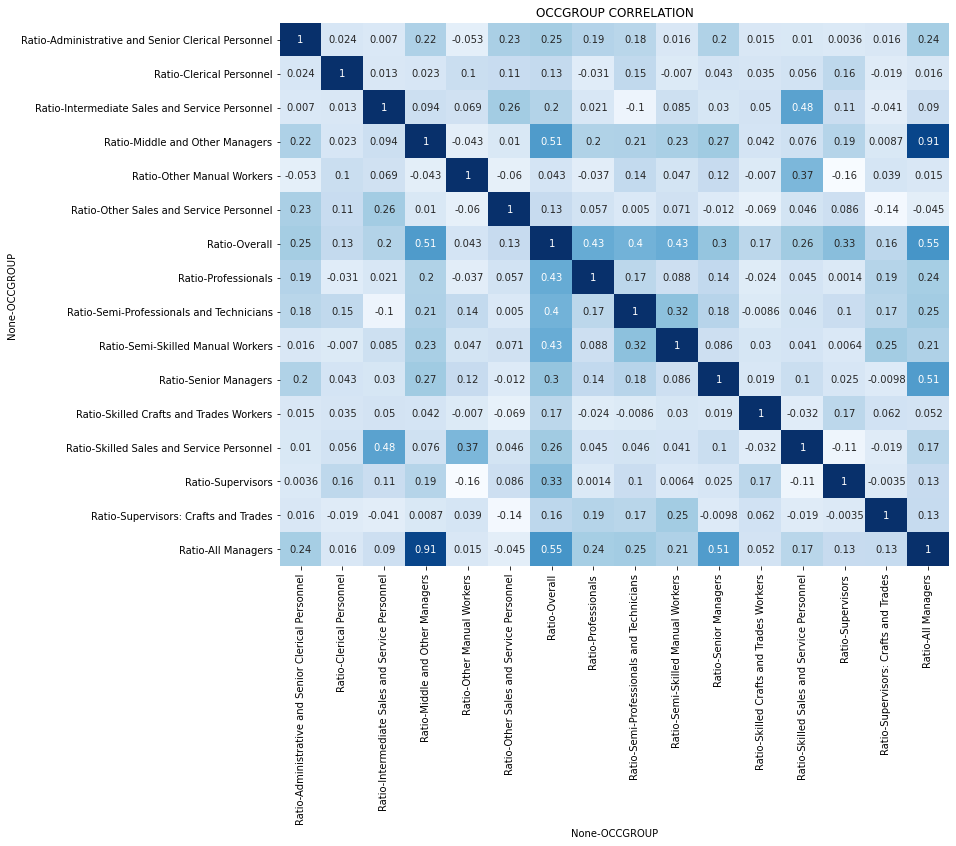

In [87]:
heatmap(df2007)

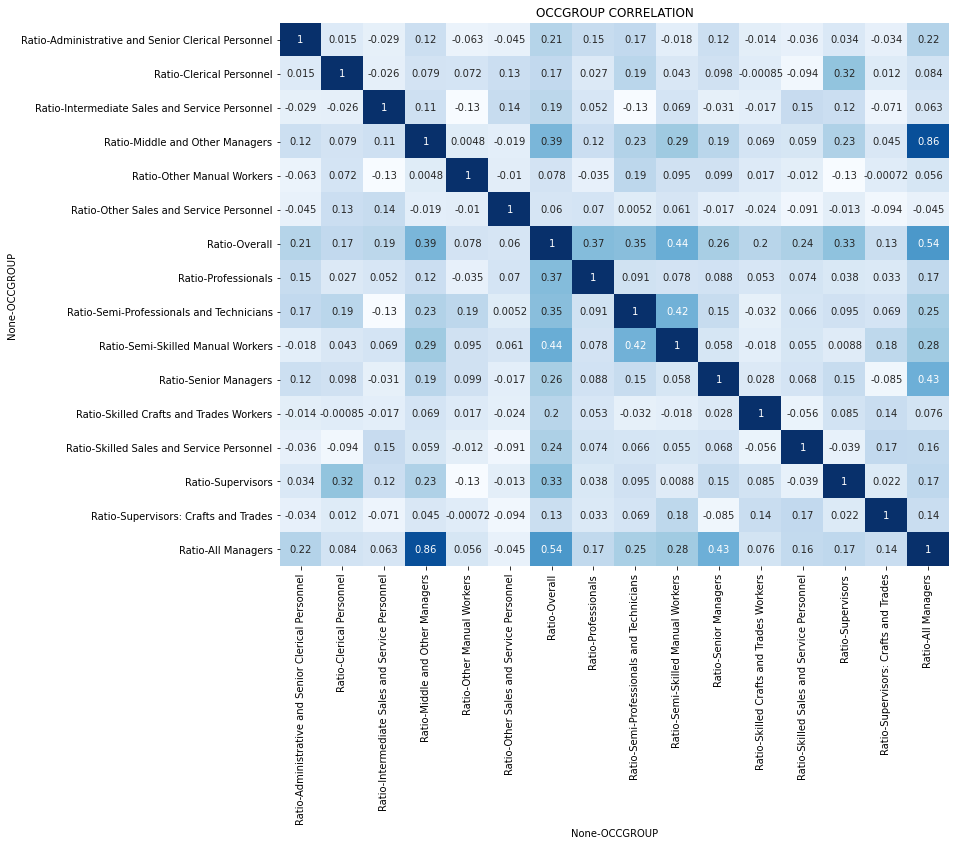

In [88]:
heatmap(df2008)

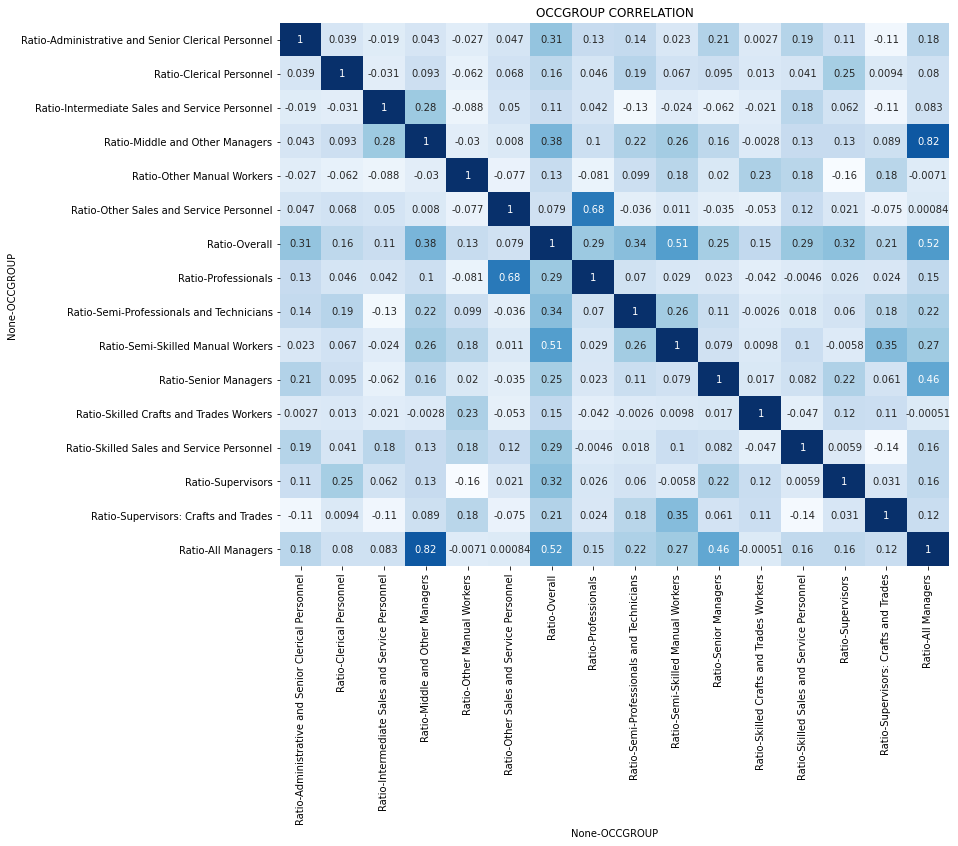

In [89]:
heatmap(df2009)

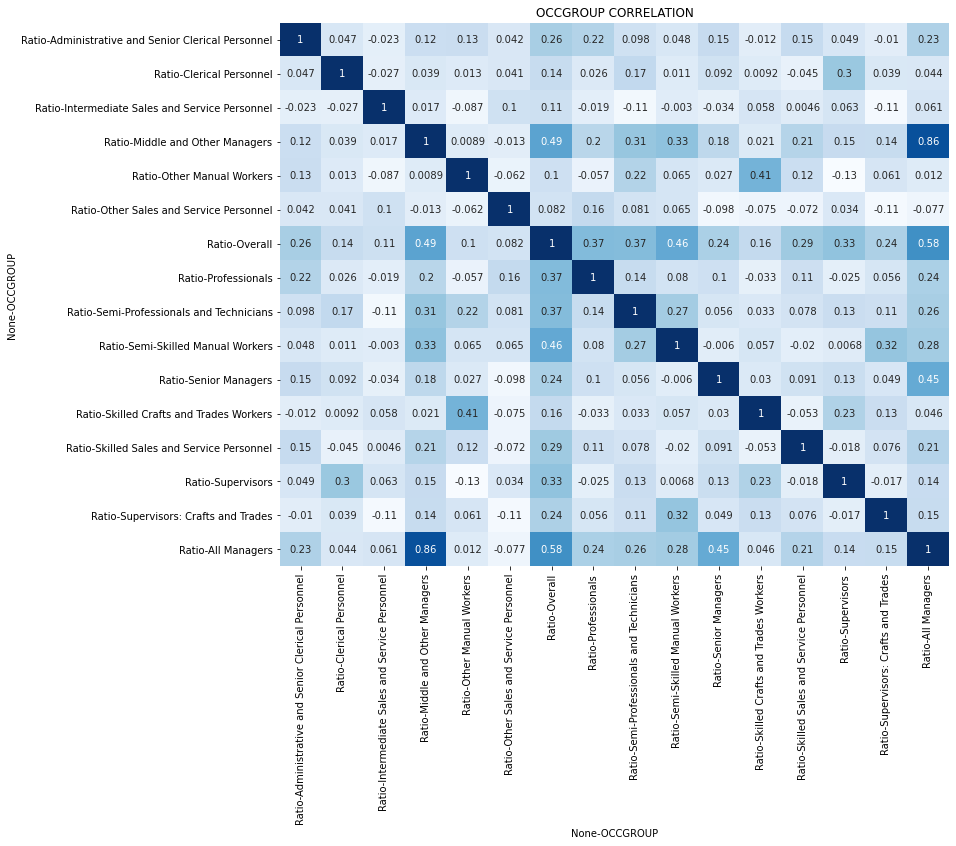

In [90]:
heatmap(df2010)

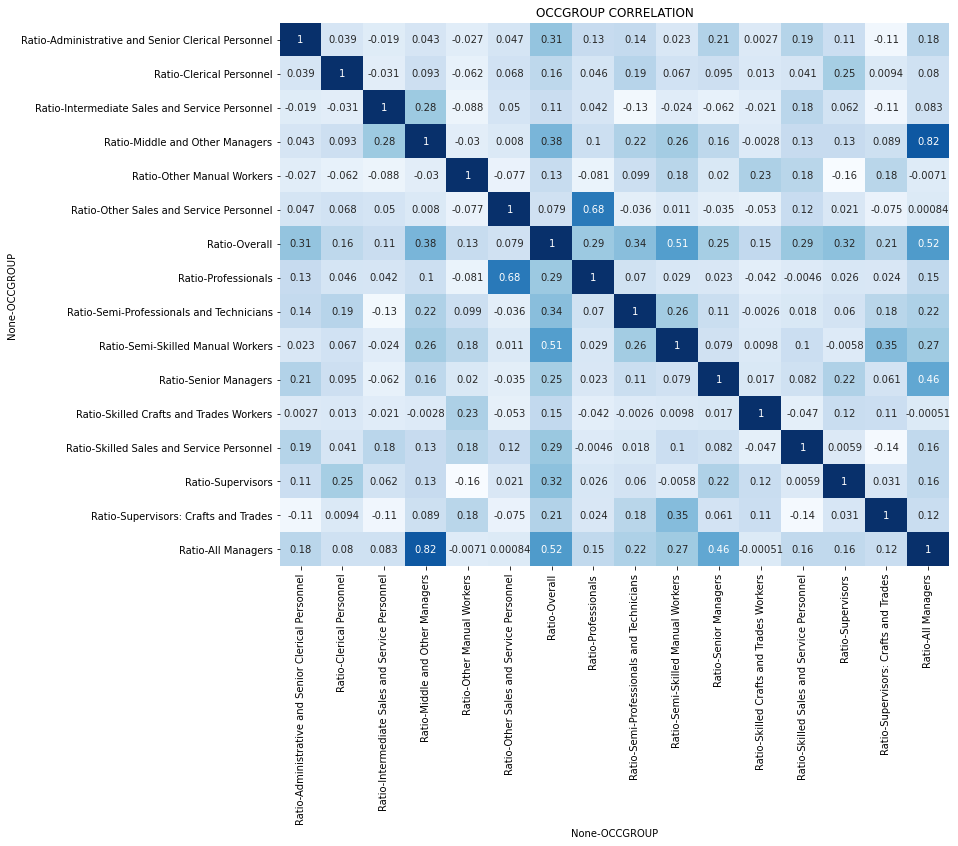

In [91]:
heatmap(df2011)

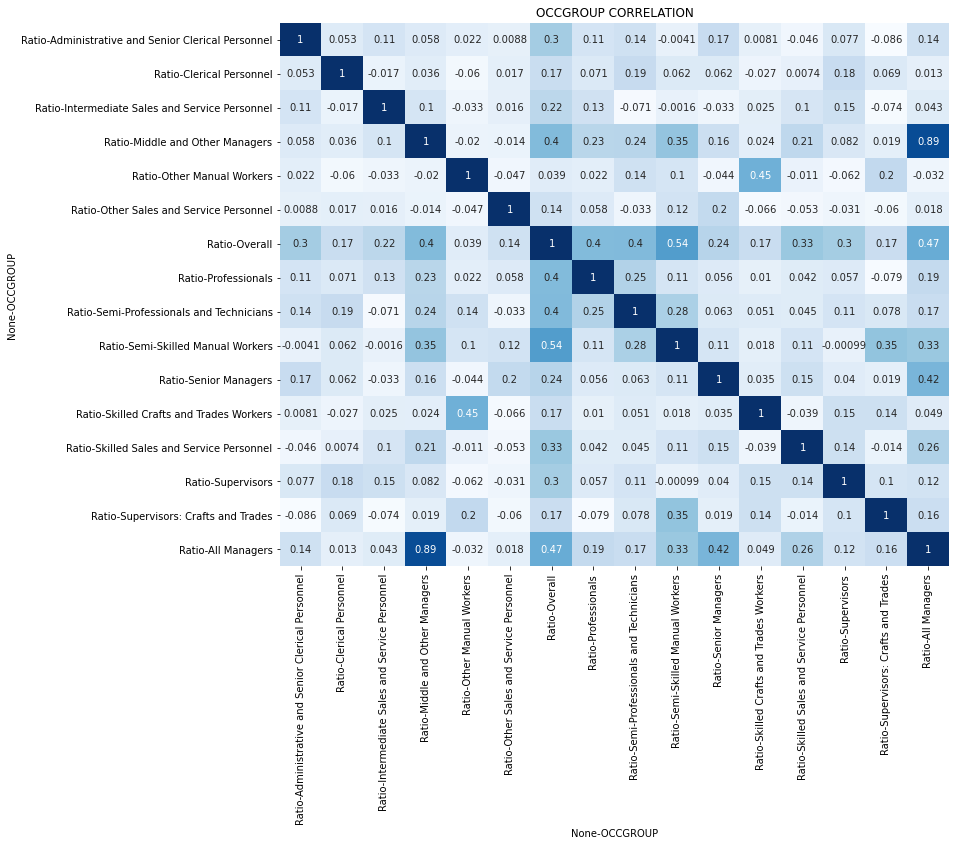

In [92]:
heatmap(df2012)

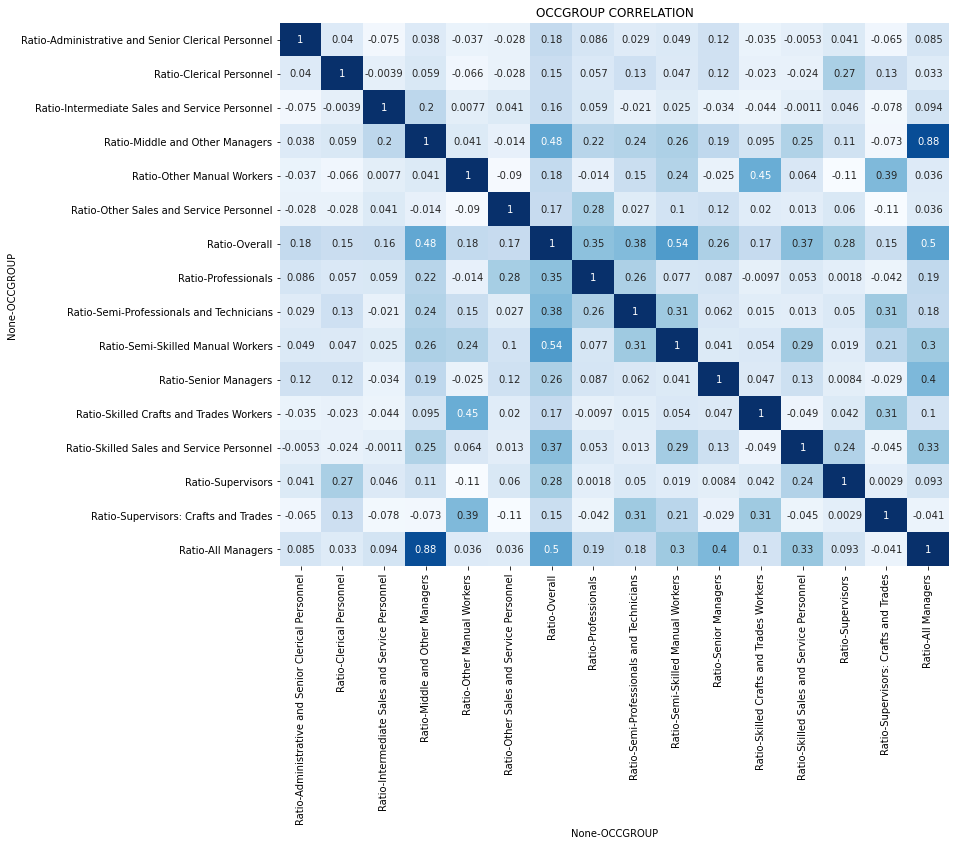

In [93]:
heatmap(df2013)

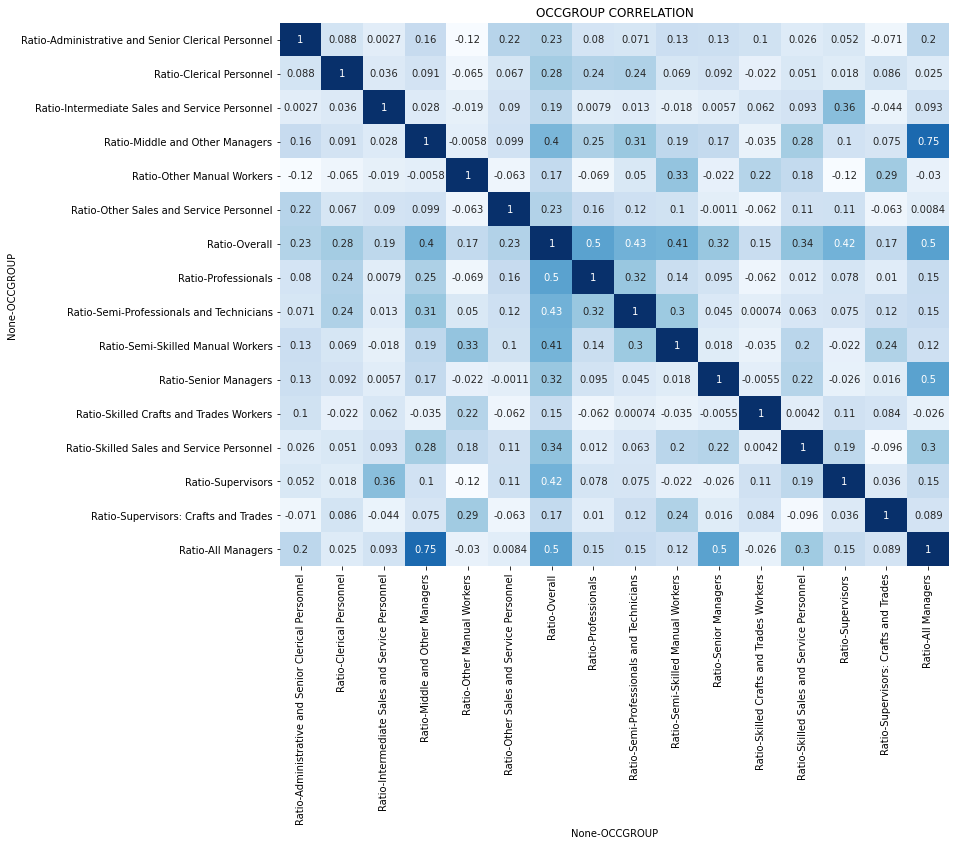

In [94]:
heatmap(df2014)

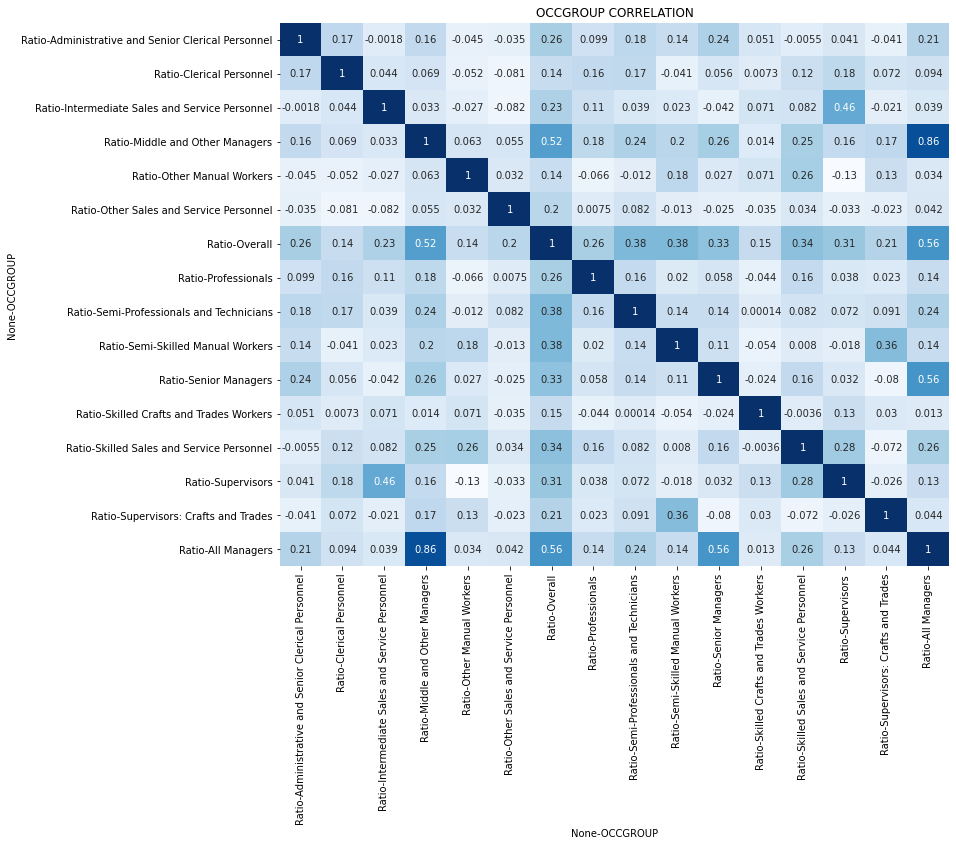

In [95]:
heatmap(df2015)

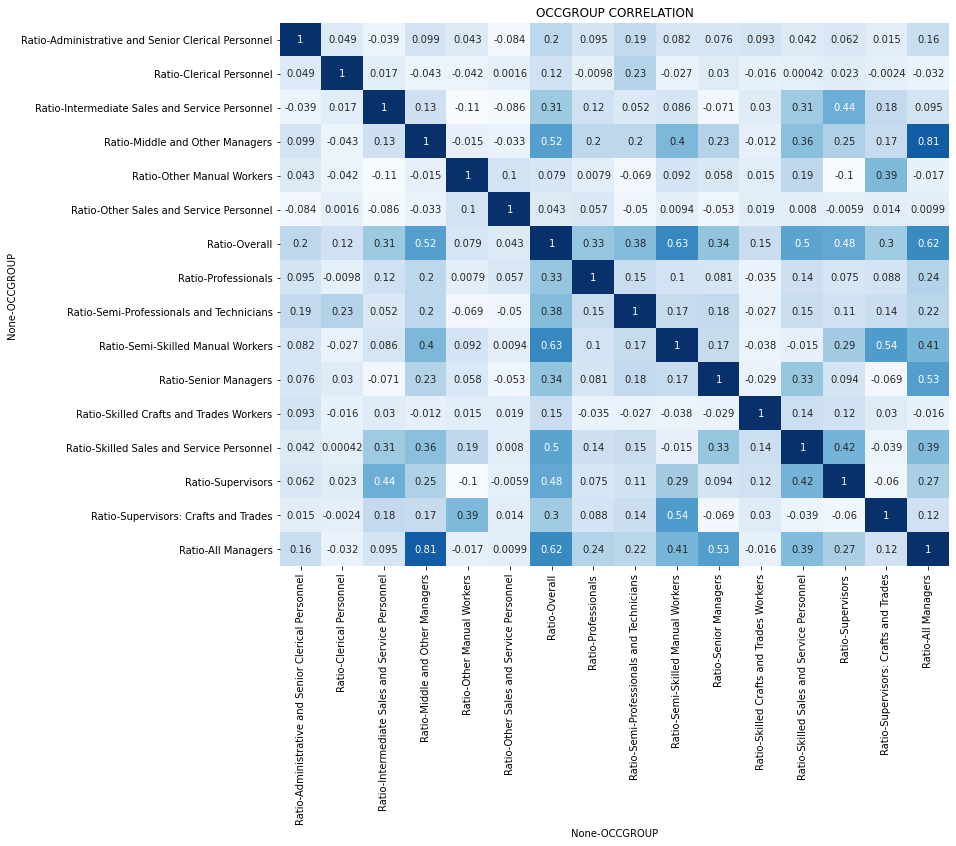

In [96]:
heatmap(df2016)

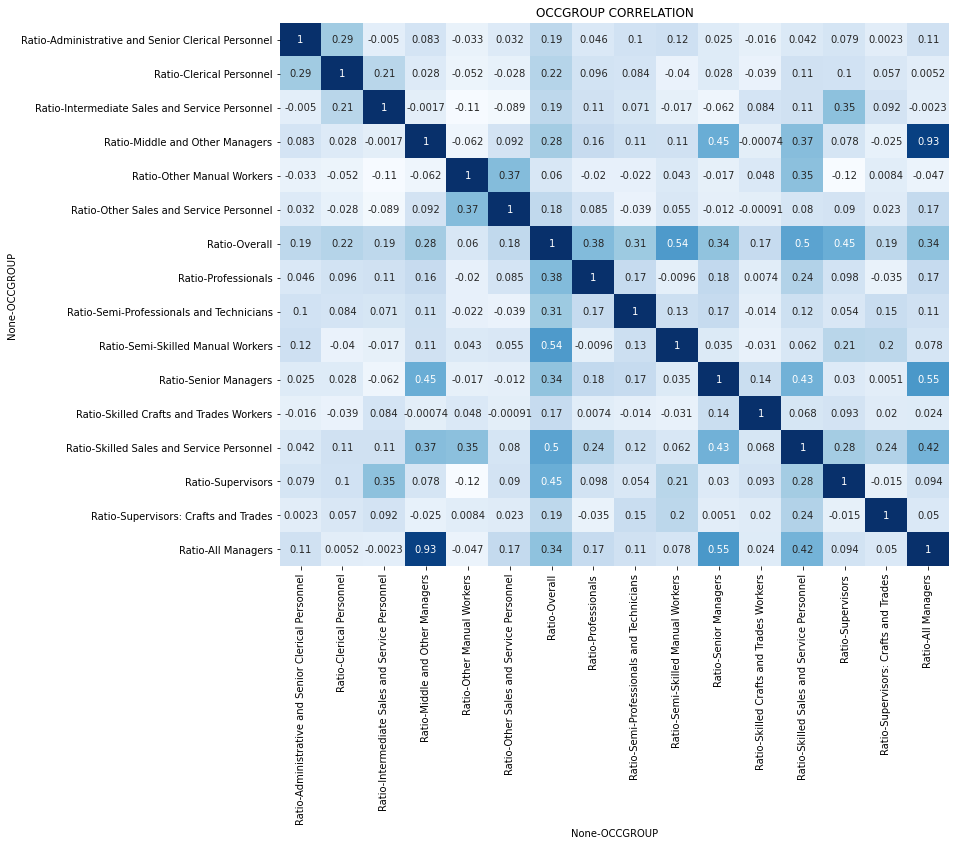

In [97]:
heatmap(df2017)

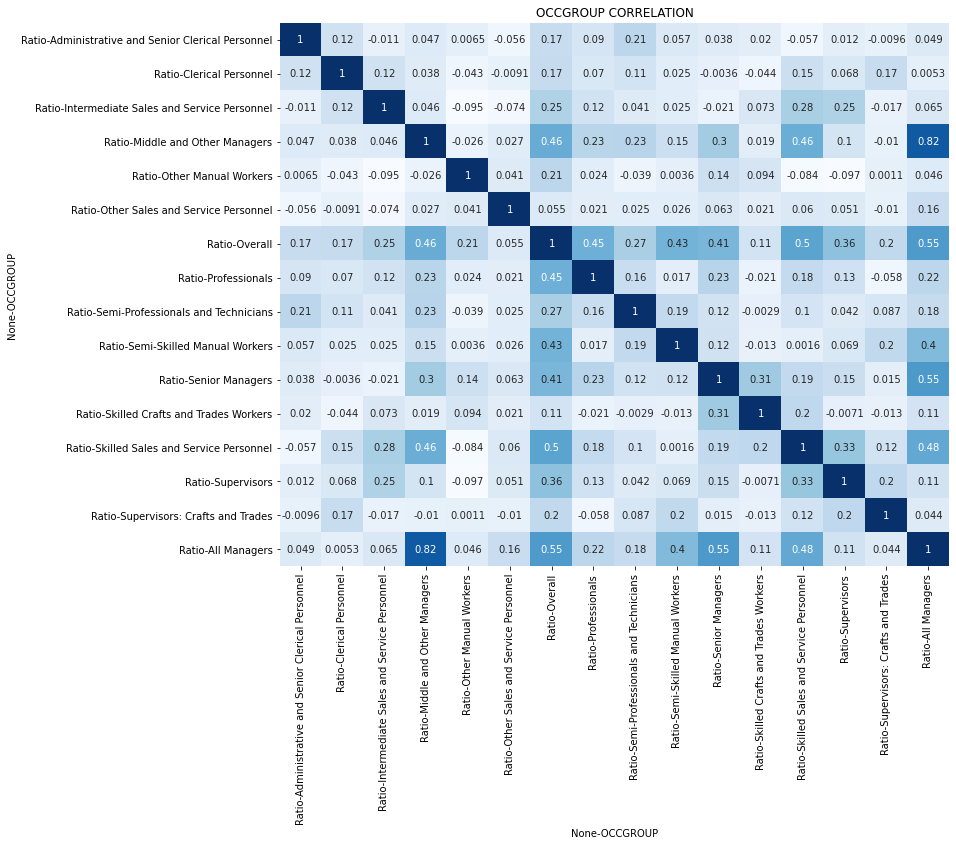

In [98]:
heatmap(df2018)

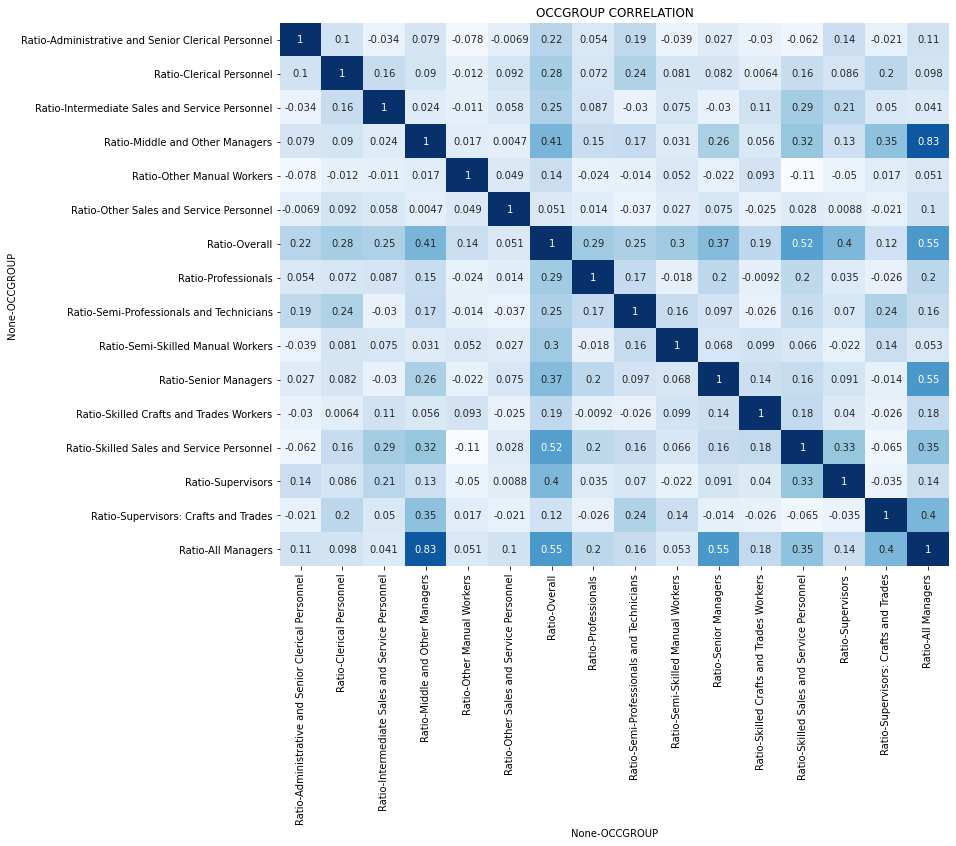

In [99]:
heatmap(df2019)

In [100]:
year= ['2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019',]

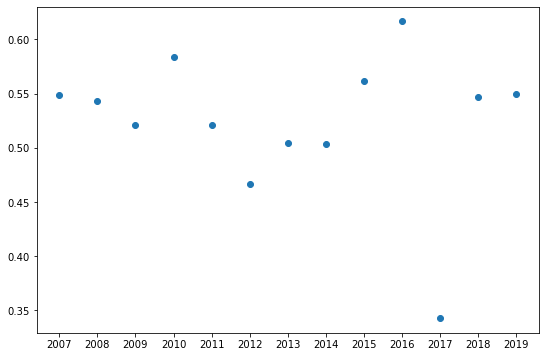

In [104]:
plt.figure(figsize=(9,6))
plt.scatter(year, data)
plt.show()

# the overall with All Managers correlation was not changing over the years, meaning there's a constant correlation between the two

In [147]:
# Women/Men ratio based on 2016 LMA data in Canada
ratios = {'Overall':0.93,
    'All Managers': 0.62,
    'Professionals': 1.27,
    'Semi-Professionals and Technicians': 1.16,
    'Supervisors': 1.27,
    'Supervisors: Crafts and Trades': 0.12,
    'Administrative and Senior Clerical Personnel': 4.78,
    'Skilled Sales and Service Personnel': 1.02,
    'Skilled Crafts and Trades Workers': 0.04,
    'Clerical Personnel': 2.24,
    'Intermediate Sales and Service Personnel':2.14,
    'Semi-Skilled Manual Workers': 0.20,
    'Other Sales and Service Personnel': 1.27,
    'Other Manual Workers': 0.26,
}
# calculate the ratios of companies that achieved in each occ group, 
# considering in the range of 10% above and 10% less of Women/Men LMA ratios is achieved
AchievedRatio_year = []
def calAchievedPercent(DF, param):    
    a = []
    Var_Corr, DF_unstack = correlations(DF)
    for i in DF_unstack[('Ratio', param)]:
        if i >= ratios[param]-0.1 and i <= ratios[param]+0.1:
            a.append(i)
    ratio = len(a)/len(np.unique(DF['EMPLOYERNAME']))
    AchievedRatio_year.append(ratio)
    return ratio


In [122]:
dataframe_list = [df2007,df2008,df2009,df2010,df2011,df2012,df2013,df2014,df2015,df2016,
                  df2017,df2018,df2019]


achieved percent: 9.80%
achieved percent: 8.44%
achieved percent: 10.28%
achieved percent: 9.95%
achieved percent: 10.28%
achieved percent: 8.97%
achieved percent: 10.51%
achieved percent: 10.89%
achieved percent: 13.29%
achieved percent: 12.71%
achieved percent: 11.65%
achieved percent: 10.67%
achieved percent: 12.65%


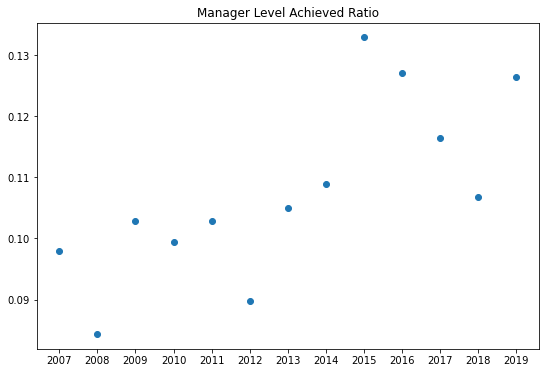

In [123]:
for i in dataframe_list:
    print('achieved percent: {:.2%}'.format(calAchievedPercent(i,'All Managers')))
plt.figure(figsize=(9,6))
plt.scatter(year, AchievedRatio_year)
plt.title('Manager Level Achieved Ratio')
plt.show()

# All Managers achieved rate is improving over the years, meaning we are doing better and better achieveing Managers level diversification

achieved percent: 0.36%
achieved percent: 1.23%
achieved percent: 0.93%
achieved percent: 1.27%
achieved percent: 0.93%
achieved percent: 1.15%
achieved percent: 0.97%
achieved percent: 1.78%
achieved percent: 1.84%
achieved percent: 2.71%
achieved percent: 1.79%
achieved percent: 1.81%
achieved percent: 2.19%


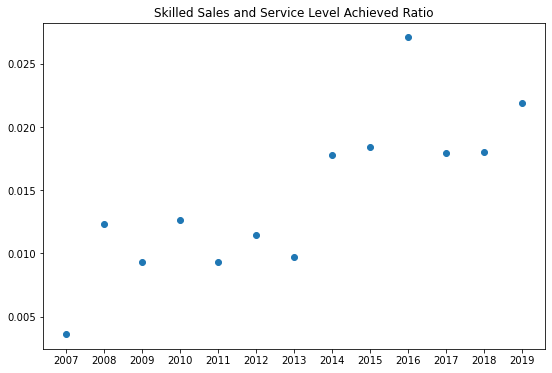

In [125]:
for i in dataframe_list:
    print('achieved percent: {:.2%}'.format(calAchievedPercent(i,'Skilled Sales and Service Personnel')))
plt.figure(figsize=(9,6))
plt.scatter(year, AchievedRatio_year)
plt.title('Skilled Sales and Service Level Achieved Ratio')
plt.show()

# Skilled Sales and Service achieved rate is improving over the years

achieved percent: 2.90%
achieved percent: 3.16%
achieved percent: 2.80%
achieved percent: 2.35%
achieved percent: 2.80%
achieved percent: 2.10%
achieved percent: 2.72%
achieved percent: 1.19%
achieved percent: 0.82%
achieved percent: 2.08%
achieved percent: 3.41%
achieved percent: 2.96%
achieved percent: 3.20%


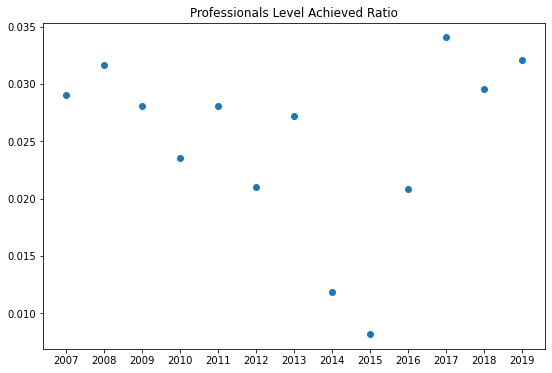

In [127]:
for i in dataframe_list:
    print('achieved percent: {:.2%}'.format(calAchievedPercent(i,'Professionals')))
plt.figure(figsize=(9,6))
plt.scatter(year, AchievedRatio_year)
plt.title('Professionals Level Achieved Ratio')
plt.show()

# Professionals achieved rate was droping and then improving since 2015

achieved percent: 0.36%
achieved percent: 0.53%
achieved percent: 0.56%
achieved percent: 0.36%
achieved percent: 0.56%
achieved percent: 0.00%
achieved percent: 0.58%
achieved percent: 0.00%
achieved percent: 0.41%
achieved percent: 1.67%
achieved percent: 1.25%
achieved percent: 1.15%
achieved percent: 0.84%


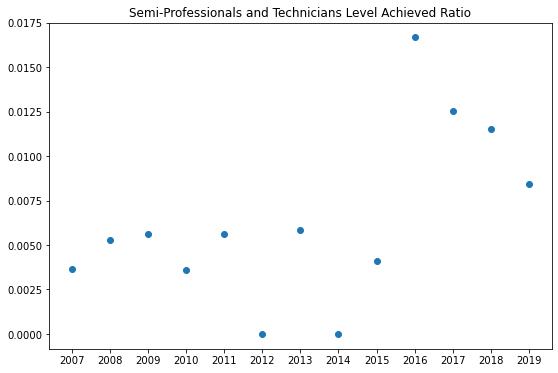

In [129]:
for i in dataframe_list:
    print('achieved percent: {:.2%}'.format(calAchievedPercent(i,'Semi-Professionals and Technicians')))
plt.figure(figsize=(9,6))
plt.scatter(year, AchievedRatio_year)
plt.title('Semi-Professionals and Technicians Level Achieved Ratio')
plt.show()

# Semi-Professionals and Technicians is improving over the years

achieved percent: 2.18%
achieved percent: 1.41%
achieved percent: 4.11%
achieved percent: 1.45%
achieved percent: 4.11%
achieved percent: 2.67%
achieved percent: 1.95%
achieved percent: 2.77%
achieved percent: 3.68%
achieved percent: 2.50%
achieved percent: 1.97%
achieved percent: 2.63%
achieved percent: 2.70%


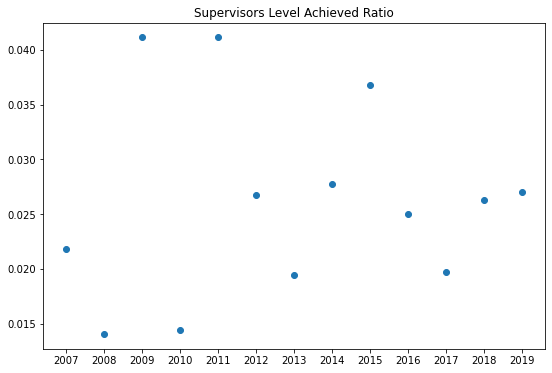

In [131]:
for i in dataframe_list:
    print('achieved percent: {:.2%}'.format(calAchievedPercent(i,'Supervisors')))
plt.figure(figsize=(9,6))
plt.scatter(year, AchievedRatio_year)
plt.title('Supervisors Level Achieved Ratio')
plt.show()

# Supervisors seems has a pattern of improving over the years

achieved percent: 14.52%
achieved percent: 13.88%
achieved percent: 13.46%
achieved percent: 13.20%
achieved percent: 13.46%
achieved percent: 14.31%
achieved percent: 15.56%
achieved percent: 13.47%
achieved percent: 12.68%
achieved percent: 14.79%
achieved percent: 14.52%
achieved percent: 13.30%
achieved percent: 13.32%


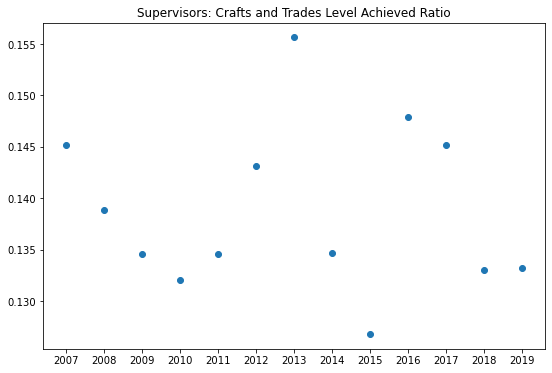

In [133]:
for i in dataframe_list:
    print('achieved percent: {:.2%}'.format(calAchievedPercent(i,'Supervisors: Crafts and Trades')))
plt.figure(figsize=(9,6))
plt.scatter(year, AchievedRatio_year)
plt.title('Supervisors: Crafts and Trades Level Achieved Ratio')
plt.show()

# Supervisors: Crafts and Trades does not have a clear pattern

achieved percent: 0.54%
achieved percent: 0.35%
achieved percent: 1.31%
achieved percent: 0.72%
achieved percent: 1.31%
achieved percent: 0.38%
achieved percent: 0.19%
achieved percent: 0.59%
achieved percent: 0.41%
achieved percent: 0.62%
achieved percent: 0.18%
achieved percent: 0.16%
achieved percent: 0.17%


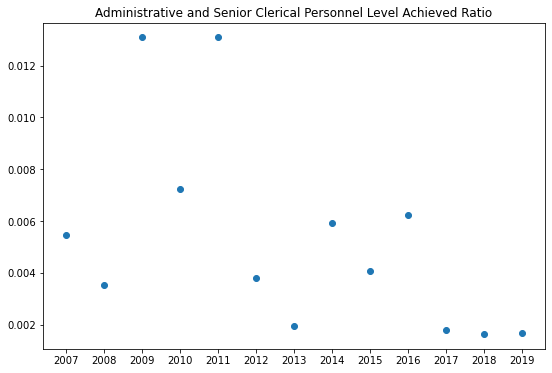

In [135]:
for i in dataframe_list:
    print('achieved percent: {:.2%}'.format(calAchievedPercent(i,'Administrative and Senior Clerical Personnel')))
plt.figure(figsize=(9,6))
plt.scatter(year, AchievedRatio_year)
plt.title('Administrative and Senior Clerical Personnel Level Achieved Ratio')
plt.show()

# Administrative and Senior Clerical Personnel seems have a pattern of decreasing

achieved percent: 67.15%
achieved percent: 67.49%
achieved percent: 69.91%
achieved percent: 67.99%
achieved percent: 69.91%
achieved percent: 69.85%
achieved percent: 69.65%
achieved percent: 69.90%
achieved percent: 68.10%
achieved percent: 68.12%
achieved percent: 67.74%
achieved percent: 67.32%
achieved percent: 65.43%


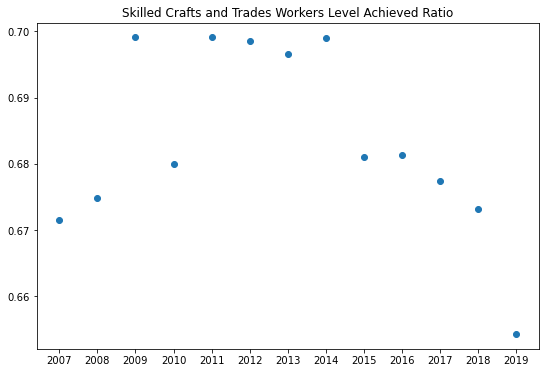

In [138]:
for i in dataframe_list:
    print('achieved percent: {:.2%}'.format(calAchievedPercent(i,'Skilled Crafts and Trades Workers')))
plt.figure(figsize=(9,6))
plt.scatter(year, AchievedRatio_year)
plt.title('Skilled Crafts and Trades Workers Level Achieved Ratio')
plt.show()

# Skilled Crafts and Trades Workers has no clear pattern

achieved percent: 5.99%
achieved percent: 5.27%
achieved percent: 3.93%
achieved percent: 4.70%
achieved percent: 3.93%
achieved percent: 3.63%
achieved percent: 4.86%
achieved percent: 5.15%
achieved percent: 1.84%
achieved percent: 3.75%
achieved percent: 4.48%
achieved percent: 4.43%
achieved percent: 2.53%


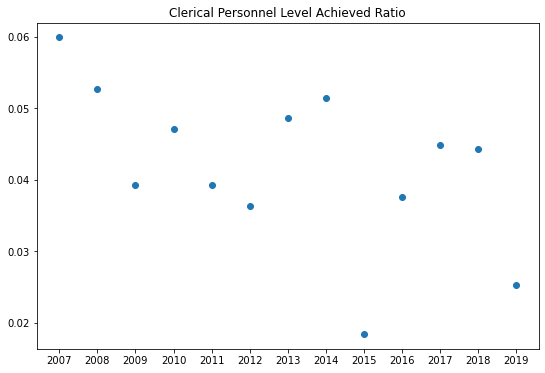

In [140]:
for i in dataframe_list:
    print('achieved percent: {:.2%}'.format(calAchievedPercent(i,'Clerical Personnel')))
plt.figure(figsize=(9,6))
plt.scatter(year, AchievedRatio_year)
plt.title('Clerical Personnel Level Achieved Ratio')
plt.show()

# Clerical Personnel has a pattern of decreasing

achieved percent: 1.27%
achieved percent: 0.53%
achieved percent: 0.37%
achieved percent: 0.72%
achieved percent: 0.37%
achieved percent: 0.19%
achieved percent: 0.78%
achieved percent: 2.18%
achieved percent: 1.64%
achieved percent: 1.88%
achieved percent: 2.33%
achieved percent: 1.31%
achieved percent: 1.35%


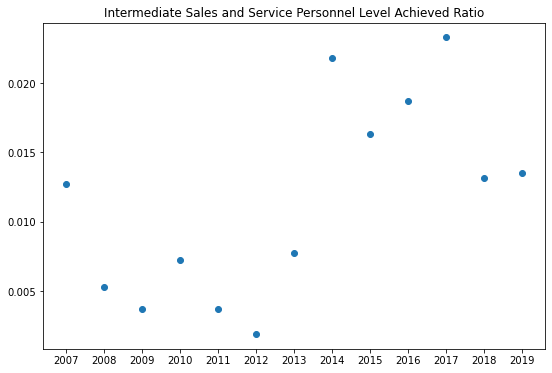

In [142]:
for i in dataframe_list:
    print('achieved percent: {:.2%}'.format(calAchievedPercent(i,'Intermediate Sales and Service Personnel')))
plt.figure(figsize=(9,6))
plt.scatter(year, AchievedRatio_year)
plt.title('Intermediate Sales and Service Personnel Level Achieved Ratio')
plt.show()

# Intermediate Sales and Service Personnel has a pattern of increasing

achieved percent: 10.53%
achieved percent: 10.02%
achieved percent: 12.71%
achieved percent: 10.13%
achieved percent: 12.71%
achieved percent: 12.21%
achieved percent: 13.04%
achieved percent: 13.07%
achieved percent: 12.47%
achieved percent: 13.33%
achieved percent: 12.72%
achieved percent: 14.12%
achieved percent: 14.67%


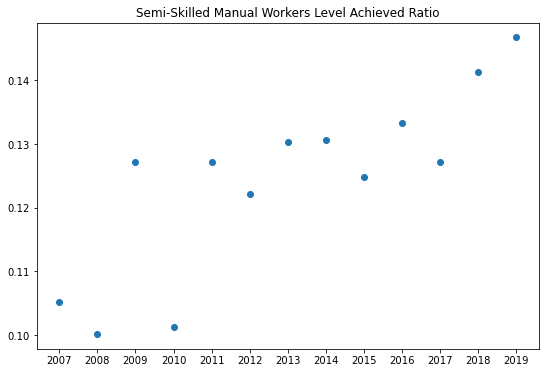

In [144]:
for i in dataframe_list:
    print('achieved percent: {:.2%}'.format(calAchievedPercent(i,'Semi-Skilled Manual Workers')))
plt.figure(figsize=(9,6))
plt.scatter(year, AchievedRatio_year)
plt.title('Semi-Skilled Manual Workers Level Achieved Ratio')
plt.show()

# Semi-Skilled Manual Workers has a increasing pattern

achieved percent: 0.36%
achieved percent: 0.70%
achieved percent: 0.37%
achieved percent: 0.90%
achieved percent: 0.37%
achieved percent: 0.57%
achieved percent: 0.19%
achieved percent: 1.19%
achieved percent: 0.00%
achieved percent: 0.62%
achieved percent: 0.36%
achieved percent: 0.49%
achieved percent: 0.51%


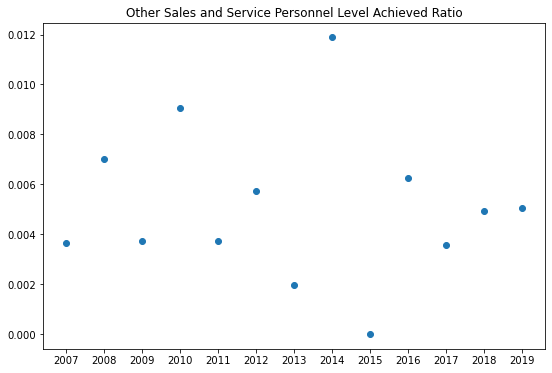

In [146]:
for i in dataframe_list:
    print('achieved percent: {:.2%}'.format(calAchievedPercent(i,'Other Sales and Service Personnel')))
plt.figure(figsize=(9,6))
plt.scatter(year, AchievedRatio_year)
plt.title('Other Sales and Service Personnel Level Achieved Ratio')
plt.show()

# Other Sales and Service Personnel has no clear pattern

achieved percent: 3.99%
achieved percent: 5.80%
achieved percent: 4.67%
achieved percent: 3.25%
achieved percent: 4.67%
achieved percent: 4.20%
achieved percent: 4.28%
achieved percent: 5.94%
achieved percent: 6.13%
achieved percent: 5.62%
achieved percent: 4.30%
achieved percent: 3.12%
achieved percent: 4.05%


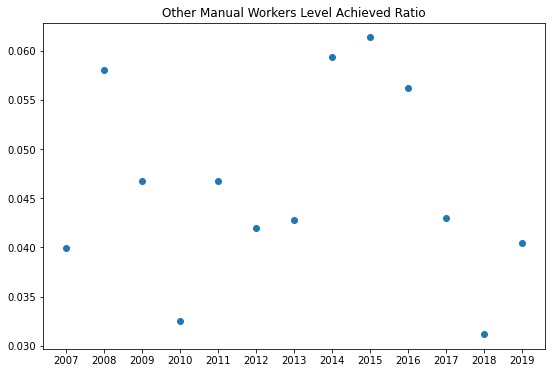

In [148]:
for i in dataframe_list:
    print('achieved percent: {:.2%}'.format(calAchievedPercent(i,'Other Manual Workers')))
plt.figure(figsize=(9,6))
plt.scatter(year, AchievedRatio_year)
plt.title('Other Manual Workers Level Achieved Ratio')
plt.show()

# Other Manual Workers has no clear pattern